# Chapter 15 - The Random Forest

## Listing 15-1. Importing the data

In [21]:
import pandas as pd

# Read the csv file
data = pd.read_csv('births_data.csv', sep=';')

# Keep useful columns
data = data[['Date', 'Births']]


## Listing 15-2. Feature engineering

In [22]:
# Seasonality variables
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)

# Adding a year of lagged data
data['L1'] = data['Births'].shift(1)
data['L2'] = data['Births'].shift(2)
data['L3'] = data['Births'].shift(3)
data['L4'] = data['Births'].shift(4)
data['L5'] = data['Births'].shift(5)
data['L6'] = data['Births'].shift(6)
data['L7'] = data['Births'].shift(7)
data['L8'] = data['Births'].shift(8)
data['L9'] = data['Births'].shift(9)
data['L10'] = data['Births'].shift(10)
data['L11'] = data['Births'].shift(11)
data['L12'] = data['Births'].shift(12)


## Listing 15-3. Fitting the default Random Forest Regressor

In [23]:
import mlflow
mlflow.autolog()

# Create X and y object
data = data.dropna()
y = data['Births']
X = data[['Year', 'Month', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12']]

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
my_rf = RandomForestRegressor()
my_rf.fit(X_train, y_train)
fcst = my_rf.predict(X_test)

from sklearn.metrics import r2_score
r2_score(list(y_test), list(fcst))


2025/05/27 14:12:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/27 14:12:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c0bd7035cabd40f6b96d8a8c39809474', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 14:12:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as d

0.7456019365777817

## Listing 15-4. Fitting the Random Forest Regressor with hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV

my_rf = GridSearchCV(RandomForestRegressor(), 
                 {'max_features':[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                 'n_estimators': [10, 50, 100, 250, 500, 750, 1000]},
                scoring = 'r2', n_jobs = -1)

my_rf.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)


2025/05/27 14:12:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '02e11cd4d70e4908814b0468a46123ad', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 14:12:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

0.7534011670511526
{'max_features': 0.7, 'n_estimators': 250}


## Listing 15-5. Obtaining the plot of the forecast on the test data

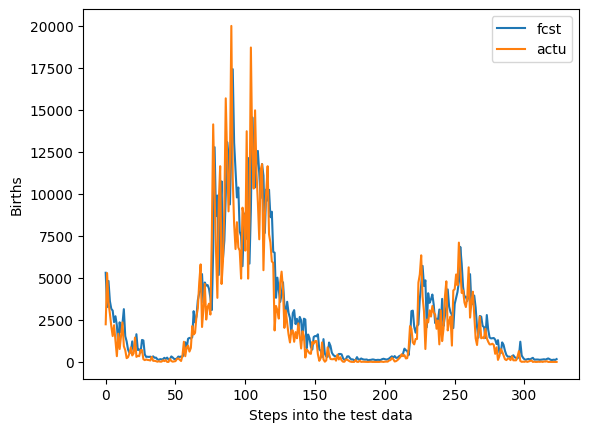

In [25]:
import matplotlib.pyplot as plt
plt.plot(list(fcst))
plt.plot(list(y_test))
plt.legend(['fcst', 'actu'])
plt.ylabel('Births')
plt.xlabel('Steps into the test data')
plt.show()


## Listing 15-6. Testing out a normal distribution for the max_features

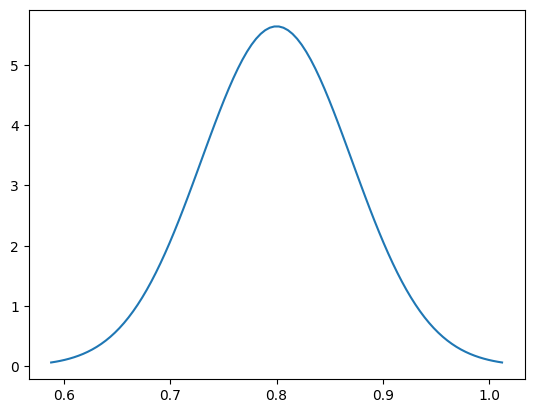

In [26]:
import numpy as np
import scipy.stats as stats
import math

mu = 0.8
variance = 0.005
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


## Listing 15-7. Testing out a uniform distribution for the n_estimators

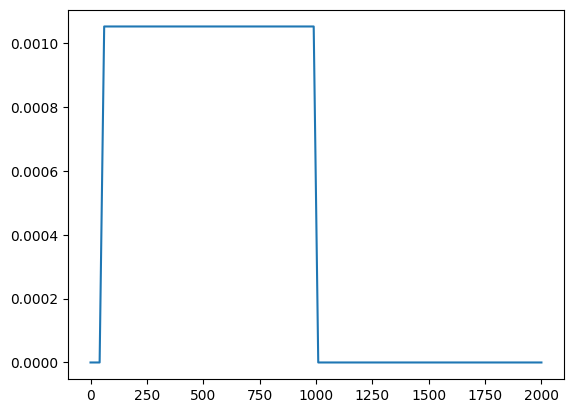

In [27]:
x = np.linspace(0, 2000, 100)
plt.plot(x, stats.uniform.pdf(x, 50, 950))
plt.show()


## Listing 15-8. RandomizedSearchCv with two distributions

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Specifying the distributions to draw from
distributions = {
    'max_features': stats.norm(0.8, math.sqrt(0.005)),
    'n_estimators': stats.randint(50, 1000)
}

# Creating the search
my_rf = RandomizedSearchCV(RandomForestRegressor(),
                           
                     distributions, n_iter=10,
                          scoring = 'r2',
                          n_jobs = -1,
                          random_state = 12345)

# Fitting the search
my_rf.fit(X_train, y_train)

# Printing the results
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)


2025/05/27 14:19:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e453a5af5e324802aa35ae375f8040ff', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 14:19:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

0.7528130470984449
{'max_features': np.float64(0.7024759740118218), 'n_estimators': 819}


## Listing 15-9.Feature Importances

In [29]:
fi = pd.DataFrame({
        'feature': X_train.columns,
        'importance': my_rf.best_estimator_.feature_importances_})

fi.sort_values('importance', ascending=False)


,feature,importance
2,L1,0.561466
3,L2,0.175941
4,L3,0.072618
5,L4,0.038316
6,L5,0.020826
7,L6,0.018465
12,L11,0.015895
10,L9,0.015860
11,L10,0.015599
13,L12,0.013989
